In [1]:
#options(repos='http://cran.md.tsukuba.ac.jp')
#options(repos='http://R.research.att.com/')
#install.packages('vegan')
#install.packages("corrplot")

## 0.「文書-抽出語」表を読み込む

In [2]:
d <- NULL
d <- read.table("export.csv", header=T, sep=",")

d[d$'h5'<=5000, 1] <- "A_レジャー"
d[d$'h5'>=5001 & d$'h5'<=10000, 1] <- "B_ビジネス"
d[d$'h5'<=1000, 2] <- "01_登別"
d[d$'h5'>=1001 & d$'h5'<= 2000, 2] <- "02_草津"
d[d$'h5'>=2001 & d$'h5'<= 3000, 2] <- "03_箱根"
d[d$'h5'>=3001 & d$'h5'<= 4000, 2] <- "04_道後"
d[d$'h5'>=4001 & d$'h5'<= 5000, 2] <- "05_湯布院"
d[d$'h5'>=5001 & d$'h5'<= 6000, 2] <- "06_札幌"
d[d$'h5'>=6001 & d$'h5'<= 7000, 2] <- "07_名古屋"
d[d$'h5'>=7001 & d$'h5'<= 8000, 2] <- "08_東京"
d[d$'h5'>=8001 & d$'h5'<= 9000, 2] <- "09_大阪"
d[d$'h5'>=9001 & d$'h5'<=10000, 2] <- "10_福岡"

d<-d[,c(1:2,11:ncol(d))]
names(d)[1] <- "カテゴリー"
names(d)[2] <- "エリア" 

## 1. 対応分析 (corresp を利用する場合)

### (a)「抽出語-文書」表 を確認する

In [3]:
d[1:10,1:10]

,カテゴリー,エリア,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,A_レジャー,01_登別,0,0,0,0,0,0,0,1
2,A_レジャー,01_登別,0,0,0,0,0,1,0,0
3,A_レジャー,01_登別,1,1,0,0,0,0,0,0
4,A_レジャー,01_登別,0,0,1,1,0,0,0,0
5,A_レジャー,01_登別,0,0,0,0,0,0,0,0
6,A_レジャー,01_登別,0,0,0,0,0,0,0,0
7,A_レジャー,01_登別,0,0,0,0,1,1,0,0
8,A_レジャー,01_登別,0,0,0,0,0,0,0,0
9,A_レジャー,01_登別,0,0,0,0,0,0,0,0


### (b) 対応分析で2次元プロットする

In [4]:
d0 <- aggregate(d[,3:ncol(d)], by=list(name=d$"カテゴリー"), sum)
row.names(d0) <- d0$name; d0$name <- NULL
d1 <- aggregate(d[,3:ncol(d)], by=list(name=d$"エリア"), sum)
row.names(d1) <- d1$name; d1$name <- NULL

table.N <- d0;
table.N <- rbind(table.N, d1)

In [5]:
# 観測度数
table.N[1:10,1:10]

,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A_レジャー,2571,2064,1093,1610,1098,1027,507,396,704,500
B_ビジネス,2142,663,1633,109,455,427,827,671,255,365
01_登別,506,371,254,264,162,165,48,84,142,110
02_草津,529,501,271,459,216,179,177,80,166,88
03_箱根,585,446,213,278,313,272,64,73,121,120
04_道後,441,217,283,312,116,125,143,115,83,102
05_湯布院,510,529,72,297,291,286,75,44,192,80
06_札幌,431,128,327,30,91,101,178,122,49,92
07_名古屋,376,132,313,19,82,62,129,122,56,89


In [6]:
library(MASS)
d_max <- min(nrow(table.N), ncol(table.N)) - 1
c <- corresp(table.N, nf=d_max)
summary(c)

       Length Class  Mode   
cor     11    -none- numeric
rscore 132    -none- numeric
cscore 462    -none- numeric
Freq   504    -none- numeric

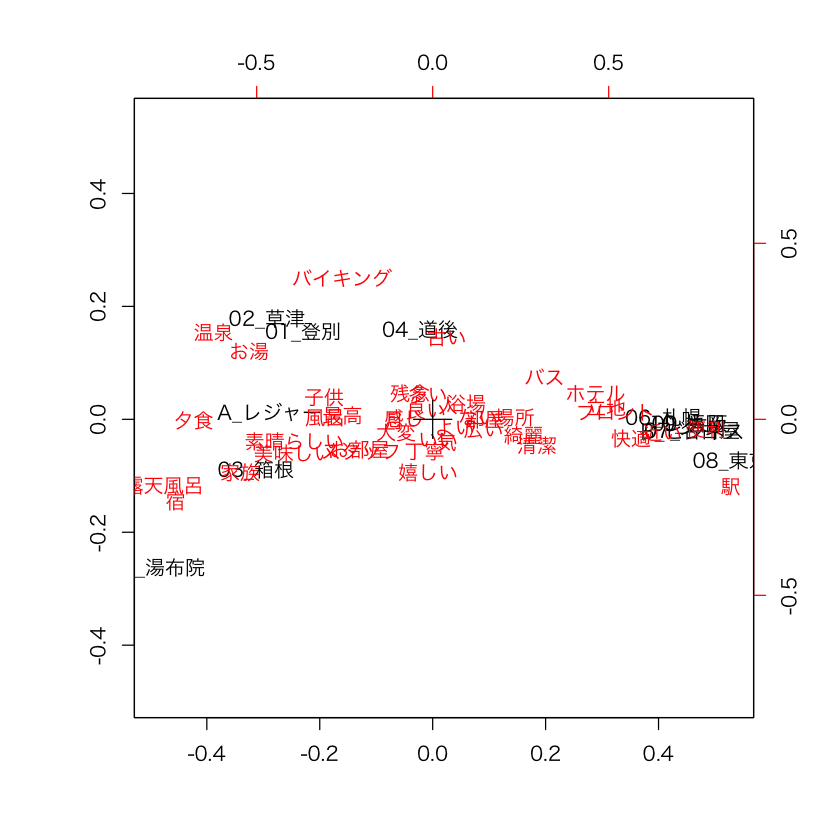

In [7]:
par(family = "HiraKakuProN-W3")
biplot(c)

### (c) 寄与率を確認する

In [8]:
# 固有値 ＝ 正準相関の2乗
k <- c$cor^2
round(k,4) 

# 寄与率 = 固有値 / 固有値の和
round(100*k / sum(k), 2)

[1] 0.1395 0.0103 0.0043 0.0018 0.0012 0.0010 0.0008 0.0004 0.0003 0.0000
[11] 0.0000

[1] 87.37  6.48  2.69  1.12  0.75  0.61  0.51  0.28  0.20  0.00  0.00

### (参考) KHCoder の出力例

In [9]:
# library("imager")
# img<-load.image("khcoder.png")
# plot(as.raster(img, 2048, 2048))

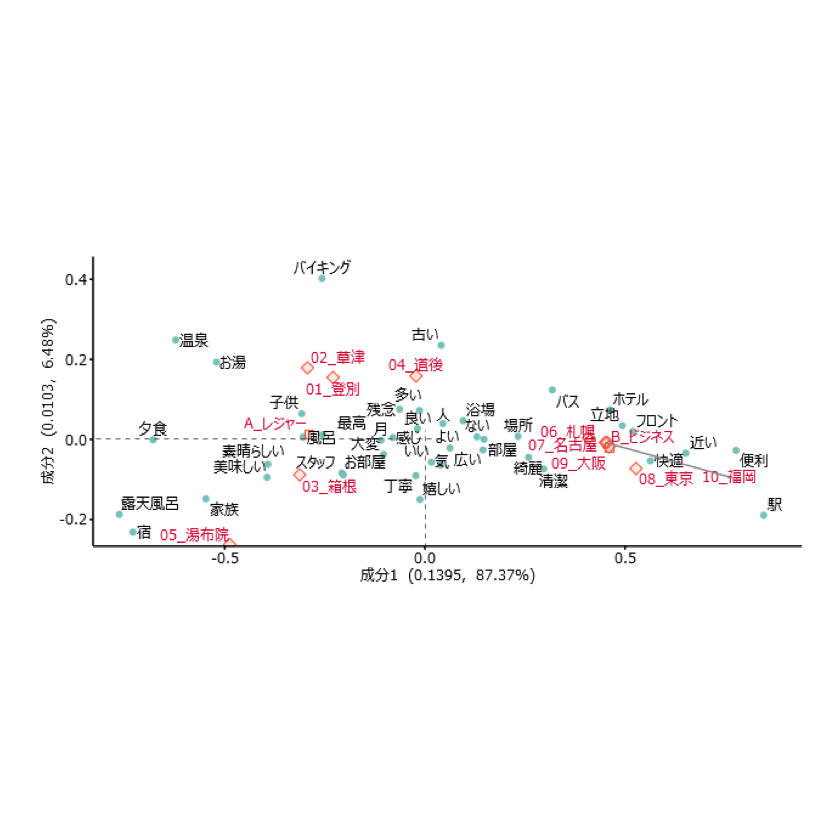

In [10]:
library("png")
img <- readPNG("khcoder-corresp.png")
par(plt=c(0, 1, 0, 1), bty="n")
plot(0, 0, xlim=c(0, 10), ylim=c(10, 0), type="n", asp=1, xaxt="n", xlab="", yaxt="n", ylab="")
rasterImage(img, 0, 10, 10, 0)

## 3. 対応分析 (自力で計算する場合)

In [11]:
# 観測度数
table.N[1:10,1:10]

,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A_レジャー,2571,2064,1093,1610,1098,1027,507,396,704,500
B_ビジネス,2142,663,1633,109,455,427,827,671,255,365
01_登別,506,371,254,264,162,165,48,84,142,110
02_草津,529,501,271,459,216,179,177,80,166,88
03_箱根,585,446,213,278,313,272,64,73,121,120
04_道後,441,217,283,312,116,125,143,115,83,102
05_湯布院,510,529,72,297,291,286,75,44,192,80
06_札幌,431,128,327,30,91,101,178,122,49,92
07_名古屋,376,132,313,19,82,62,129,122,56,89


In [12]:
# 観測度数の行合計
row.sum <- apply(table.N, 1, sum)

# 観測度数の列合計
col.sum <- apply(table.N, 2, sum)

# 観測度数の総計
n <- sum(table.N)

In [13]:
# 期待度数
expected <- outer(row.sum, col.sum) / sum(table.N)
round(expected, 2)[1:10, 1:10]

,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,2896.82,1676.14,1675.52,1056.57,954.54,893.69,819.94,655.83,589.44,531.67
B_ビジネス,1816.18,1050.86,1050.48,662.43,598.46,560.31,514.06,411.17,369.56,333.33
01_登別,510.34,295.29,295.18,186.14,168.17,157.45,144.45,115.54,103.84,93.67
02_草津,651.69,377.08,376.94,237.69,214.74,201.05,184.46,147.54,132.61,119.61
03_箱根,642.72,371.89,371.75,234.42,211.79,198.28,181.92,145.51,130.78,117.96
04_道後,441.23,255.30,255.21,160.93,145.39,136.12,124.89,99.89,89.78,80.98
05_湯布院,650.84,376.58,376.45,237.38,214.46,200.79,184.22,147.35,132.43,119.45
06_札幌,373.15,215.91,215.83,136.10,122.96,115.12,105.62,84.48,75.93,68.49
07_名古屋,338.78,196.02,195.95,123.57,111.63,104.52,95.89,76.70,68.94,62.18
08_東京,369.94,214.05,213.97,134.93,121.90,114.13,104.71,83.75,75.28,67.90


In [14]:
# # Chi-squared test
# chisq <- chisq.test(table.N)

# #  Residuals
# residuals <- chisq$residuals
# residuals[1:10,1:10]

In [15]:
# χ二乗距離
chisq <- (table.N - expected)^2/expected
round(chisq, 2)[1:10,1:10]

,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A_レジャー,36.65,89.75,202.52,289.88,21.56,19.88,119.44,102.94,22.26,1.89
B_ビジネス,58.45,143.16,323.03,462.36,34.39,31.72,190.50,164.19,35.51,3.01
01_登別,0.04,19.41,5.75,32.57,0.23,0.36,64.40,8.61,14.02,2.85
02_草津,23.10,40.73,29.77,206.05,0.01,2.42,0.30,30.92,8.41,8.35
03_箱根,5.18,14.77,67.79,8.10,48.37,27.40,76.44,36.13,0.73,0.04
04_道後,0.00,5.75,3.03,141.81,5.94,0.91,2.63,2.29,0.51,5.46
05_湯布院,30.48,61.69,246.22,14.97,27.32,36.16,64.75,72.49,26.79,13.03
06_札幌,8.97,35.79,57.26,82.71,8.31,1.73,49.60,16.66,9.55,8.07
07_名古屋,4.09,20.91,69.92,88.49,7.87,17.30,11.43,26.76,2.43,11.57


In [16]:
#  残差
residuals <- (table.N - expected)/sqrt(expected)
round(residuals, 2)[1:10,1:10]

,部屋,風呂,ホテル,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A_レジャー,-6.05,9.47,-14.23,17.03,4.64,4.46,-10.93,-10.15,4.72,-1.37
B_ビジネス,7.65,-11.96,17.97,-21.50,-5.86,-5.63,13.80,12.81,-5.96,1.73
01_登別,-0.19,4.41,-2.40,5.71,-0.48,0.60,-8.03,-2.93,3.74,1.69
02_草津,-4.81,6.38,-5.46,14.35,0.09,-1.56,-0.55,-5.56,2.90,-2.89
03_箱根,-2.28,3.84,-8.23,2.85,6.95,5.23,-8.74,-6.01,-0.86,0.19
04_道後,-0.01,-2.40,1.74,11.91,-2.44,-0.95,1.62,1.51,-0.72,2.34
05_湯布院,-5.52,7.85,-15.69,3.87,5.23,6.01,-8.05,-8.51,5.18,-3.61
06_札幌,2.99,-5.98,7.57,-9.09,-2.88,-1.32,7.04,4.08,-3.09,2.84
07_名古屋,2.02,-4.57,8.36,-9.41,-2.80,-4.16,3.38,5.17,-1.56,3.40


In [17]:
# 標準化残差
residuals <- residuals / sqrt(n)

# 次元数
nb.axes <- min(nrow(residuals)-1, ncol(residuals)-1)

# 特異値分解
res.svd <- svd(residuals, nu = nb.axes, nv = nb.axes)
summary(res.svd)

  Length Class  Mode   
d  12    -none- numeric
u 132    -none- numeric
v 462    -none- numeric

In [18]:
sv <- res.svd$d[1:nb.axes] # singular value
u <-res.svd$u
v <- res.svd$v

In [19]:
# row mass
row.mass <- row.sum/n

# row coord = sv * u /sqrt(row.mass)
cc <- t(apply(u, 1, '*', sv)) # each row X sv
row.coord <- apply(cc, 2, '/', sqrt(row.mass))
rownames(row.coord) <- rownames(table.N)
colnames(row.coord) <- paste0("Dim.", 1:nb.axes)
head(round(row.coord, 3))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11
A_レジャー,-0.289,0.013,0.001,-0.004,0.000,-0.001,0.001,0.000,0.000,0,0
B_ビジネス,0.460,-0.021,-0.002,0.007,0.001,0.002,-0.002,0.000,0.000,0,0
01_登別,-0.229,0.155,0.170,0.032,-0.059,0.045,0.020,0.011,-0.006,0,0
02_草津,-0.293,0.179,-0.138,0.069,0.010,-0.020,-0.016,0.006,-0.006,0,0
03_箱根,-0.313,-0.089,0.112,0.002,0.066,-0.060,-0.003,-0.011,-0.003,0,0
04_道後,-0.022,0.158,-0.047,-0.160,0.001,0.000,0.013,-0.010,0.017,0,0


In [20]:
# col mass
col.mass <- col.sum/n

# coordinates sv * v /sqrt(col.mass)
cc <- t(apply(v, 1, '*', sv))
col.coord <- apply(cc, 2, '/', sqrt(col.mass))
rownames(col.coord) <- colnames(table.N)
colnames(col.coord) <- paste0("Dim", 1:nb.axes)
head(round(col.coord, 3))

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11
部屋,0.148,0.000,0.024,-0.004,0.003,0.005,0.027,0.001,-0.004,0,0
風呂,-0.305,0.006,-0.006,0.051,-0.012,0.007,0.009,0.007,0.012,0,0
ホテル,0.463,0.074,0.018,-0.010,-0.009,-0.001,-0.022,-0.013,-0.002,0,0
温泉,-0.622,0.248,-0.087,-0.113,-0.015,-0.033,0.003,-0.012,0.015,0,0
お部屋,-0.208,-0.084,0.035,0.017,0.040,-0.042,-0.001,-0.023,-0.005,0,0
スタッフ,-0.204,-0.089,0.038,-0.022,0.029,-0.001,0.027,-0.001,-0.028,0,0


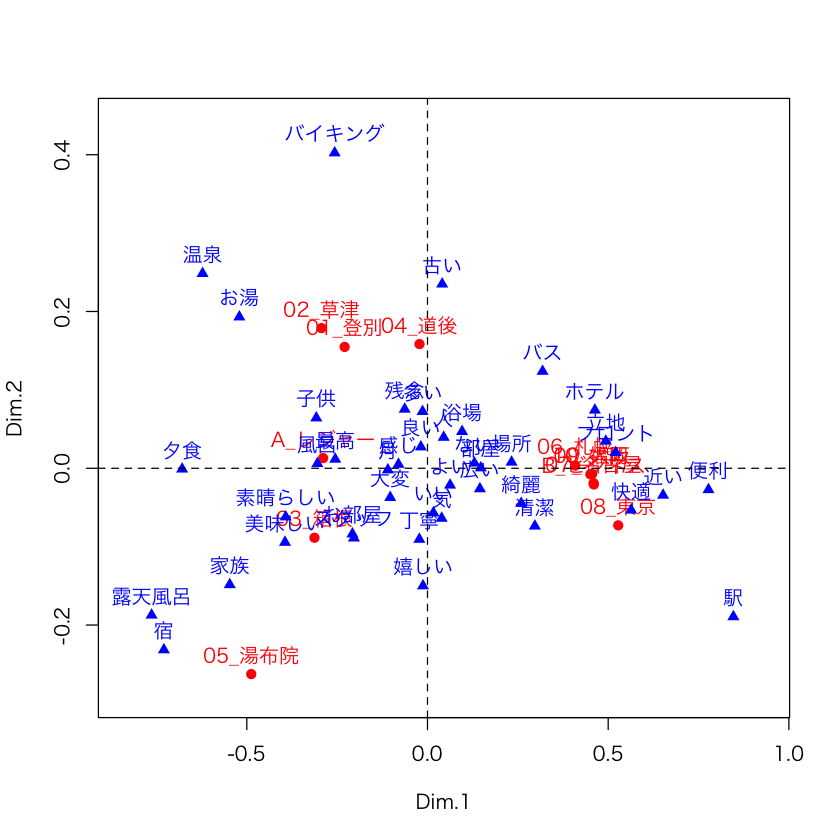

In [21]:
par(family = "HiraKakuProN-W3")

xlim <- range(c(row.coord[,1], col.coord[,1]))*1.1
ylim <- range(c(row.coord[,2], col.coord[,2]))*1.1

# 行方向のプロット (外部変数)
plot(row.coord, pch=19, col = "red", xlim = xlim, ylim = ylim)
text(row.coord, labels =rownames(row.coord), pos = 3, col ="red")

# 列方向のプロット (単語)
points(col.coord, pch=17, col = "blue")
text(col.coord, labels =rownames(col.coord), pos = 3, col ="blue")
abline(v=0, h=0, lty = 2)

In [22]:
# 固有値
k <- res.svd$d^2
round(k,4) 

# 寄与率
round(100*k / sum(k), 2)

[1] 0.1395 0.0103 0.0043 0.0018 0.0012 0.0010 0.0008 0.0004 0.0003 0.0000
[11] 0.0000 0.0000

[1] 87.37  6.48  2.69  1.12  0.75  0.61  0.51  0.28  0.20  0.00  0.00  0.00

### (参考) KHCoder の出力例

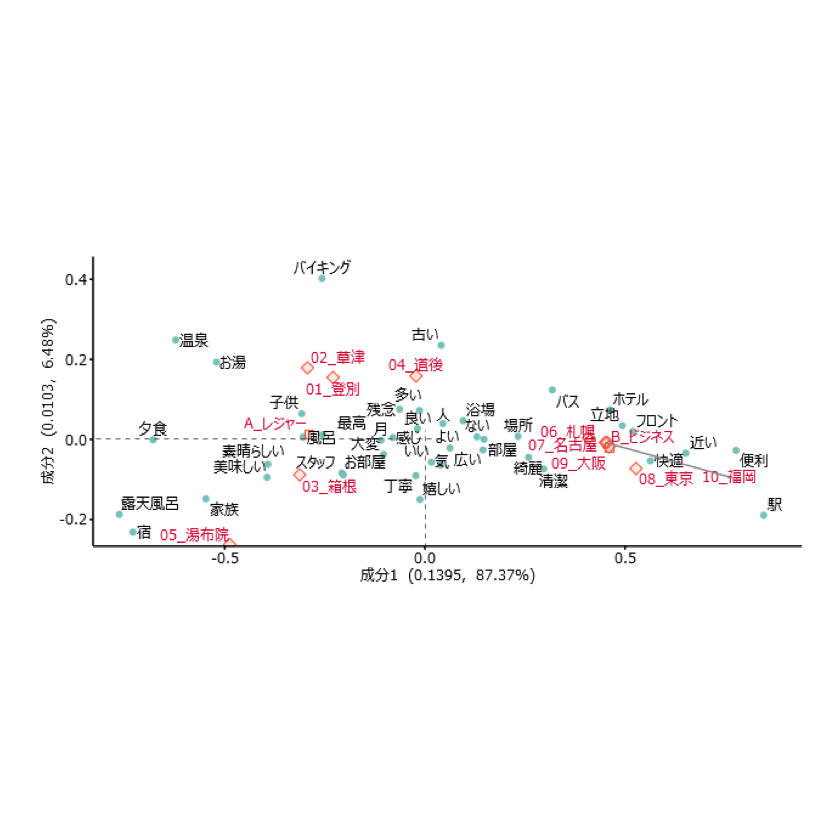

In [23]:
img <- readPNG("khcoder-corresp.png")
par(plt=c(0, 1, 0, 1), bty="n")
plot(0, 0, xlim=c(0, 10), ylim=c(0, 10), type="n", asp=1, xaxt="n", xlab="", yaxt="n", ylab="")
rasterImage(img, 0, 10, 10, 0)